In [14]:
print('Importing packages...')
import os
import pandas
import numpy as np
import time
from matplotlib import pyplot as plt
#from IPython.display import display, HTML
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.colorbar as mcolorbar
import geopandas
#from shapely.geometry import LineString, MultiLineString, Polygon, MultiPolygon
#from shapely.ops import unary_union, split, polygonize

#import scipy
#from scipy import stats as stats
#from pprint import pprint
#from mpl_toolkits.axes_grid1 import make_axes_locatable

pandas.set_option('display.max_colwidth', -1)
debug = 1
current_year = 2017
scale = 1

# Directories to look in
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
data_dir = '/home/idies/workspace/Temporary/raddick/cra_scratch_final/'
jobs_dir = data_dir + 'lodes_wac/'
census_dir = data_dir + 'acs5/'

city_data_dir = thisdir + 'city_data/'
code_lookup_dir = thisdir + 'code_guide_lookups/'
inflation_dir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/inflation/'
figdir = thisdir + 'figures/'
mapdir = thisdir + 'maps/'
baltimore_shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'
#coastline_shapedir = census_shapefile_tiger_basedir + '2017/COASTLINE/'
extras_dir = '/home/idies/workspace/Storage/raddick/census/extras/'
baltimore_shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'

# MAPPING OPTIONS
scale = 0.25
thecolormap = 'viridis'
show_tract_labels = True
show_plot_labels = True

g = 0  # keep track of grand total of processing time
os.chdir(thisdir)
print('Now in directory: {0:}'.format(os.getcwd()))
print('ok')

Importing packages...
Now in directory: /home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act
ok


In [ ]:
states_df = pandas.read_csv(extras_dir+'statecodes.csv', encoding='utf-8', low_memory=False, index_col='STATE')
thestate = 24
if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))

state_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/tl_{0:.0f}_us_state.shp'.format(current_year))
#county_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/tl_{0:.0f}_us_county.shp'.format(current_year))

#tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

#state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

#city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
#city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
#city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})
#tract_shapes_gdf


state_shapes_gdf#.dtypes#[county_shapes_gdf['STATEFP'] == str(thestate)]

Getting census tract shapefiles for 2017...


In [ ]:


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')


Getting census tract shapefiles for 2017...
...overlaying...
...removing boundary tracts that had only tiny overlaps...


Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Counting

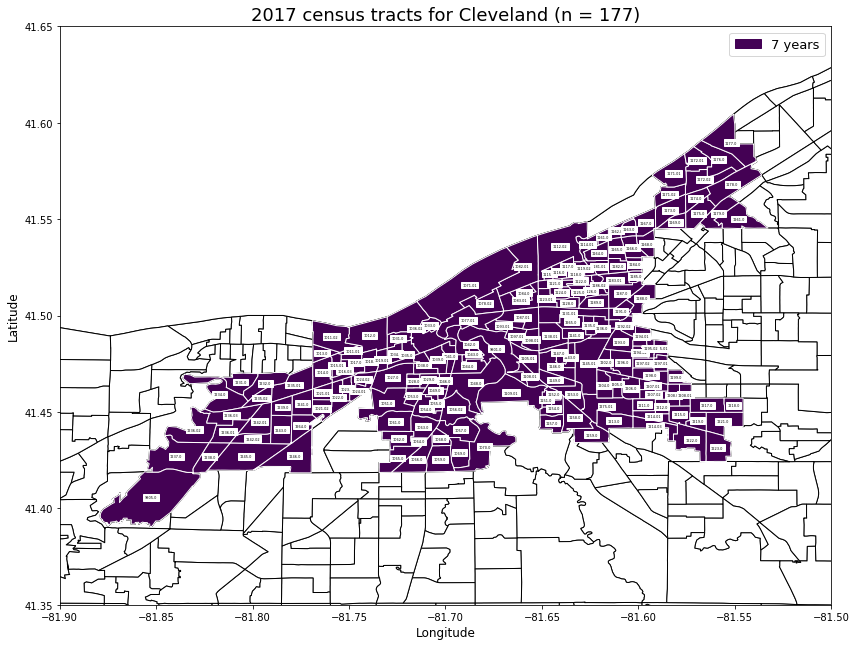

In [2]:
s = time.time()
years = np.arange(current_year-1, 2010, -1)

thecity = 'Cleveland'
thestate = 39
state_abbrev = 'oh'
citycode = 16000
citylatlon = {'N': 41.65, 'S': 41.35, 'E': -81.5, 'W': -81.9}

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')

past_city_tracts_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:.0f}'.format(thestate, citycode)]
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})
    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    past_city_tracts_gdf = past_city_tracts_gdf.append(year_city_tracts_gdf)
    print('    removing boundary tracts that had only tiny overlaps...')
    past_city_tracts_gdf = past_city_tracts_gdf[past_city_tracts_gdf.geometry.area >= 1e-10]

#print('converting columns...')
past_city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(past_city_tracts_gdf['COUNTYFP'], errors='coerce')
past_city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(past_city_tracts_gdf['NAME'], errors='coerce')
past_city_tracts_gdf.crs = city_tracts_gdf.crs
past_city_tracts_gdf = past_city_tracts_gdf.set_index(['year', 'COUNTYFP', 'NAME'])

print('Counting how many years the census tracts were stable...')
current_counties = city_tracts_gdf.index.get_level_values('COUNTYFP').unique().sort_values().tolist()
current_tracts = city_tracts_gdf.index.get_level_values('NAME').unique().sort_values().tolist()

city_tracts_gdf = city_tracts_gdf.assign(nYears = np.nan)

for thiscounty in current_counties:
    for thistract in current_tracts:
        city_tracts_gdf.loc[(thiscounty, thistract), 'nYears'] = len(past_city_tracts_gdf.xs(thiscounty, level='COUNTYFP').xs(thistract, level='NAME')) + 1

e = time.time()
g = g + (e-s)
print('\n')
print('Read {0:,.0f} current tracts and {1:,.0f} past tract-years in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_tracts_gdf), len(past_city_tracts_gdf), np.floor((e-s)/60), (e-s)%60))
# Define custom discrete colorbar
bounds = []
mycmaplist = []
thecmap = plt.cm.get_cmap(thecolormap)
for i in range(0,8):
    mycmaplist.append(thecmap(i/7))
mycmap = mcolors.ListedColormap(mycmaplist)

print('plotting...')
fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))

tract_shapes_gdf.plot(ax=ax, color='white', edgecolor='black')
city_tracts_gdf.plot(column='nYears', ax=ax, cmap=mycmap, edgecolor='white')

plt.xlim(citylatlon['W'], citylatlon['E'])
plt.ylim(citylatlon['S'], citylatlon['N'])
plt.xlabel('Longitude', fontsize=48*scale)
plt.ylabel('Latitude', fontsize=48*scale)

purple_patch = mpatches.Patch(color=thecmap(1), label='7 years')
plt.legend(handles=[purple_patch], fontsize=52*scale)
#print(city_tracts_gdf.columns)
if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in city_tracts_gdf.iterrows():
        annotator = ix[1]
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
                    fontsize=14*scale)

plt.title('{0:.0f} census tracts for {1:} (n = {2:,.0f})'.format(current_year, thecity, len(city_tracts_gdf)), fontsize=72*scale)

plt.savefig(mapdir+'locator_map_{0:}.jpg'.format(thecity.lower()), format='jpg', dpi=300)

plt.tight_layout()
plt.show()
# Have any tracts changed in area??
#for thiscounty in past_city_tracts_gdf.index.unique(level='COUNTYFP').tolist():
#    for thistract in past_city_tracts_gdf.index.unique(level='NAME').tolist():
#        if (
#            past_city_tracts_gdf.reset_index()[
#                (past_city_tracts_gdf.reset_index()['COUNTYFP'] == thiscounty)
#                & (past_city_tracts_gdf.reset_index()['NAME'] == thistract)
#            ].geometry.area.std()
#        > 1e-5):
#            print(thiscounty, thistract)

Getting census tract shapefiles for 2017...
...overlaying...
...removing boundary tracts that had only tiny overlaps...


Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Counting

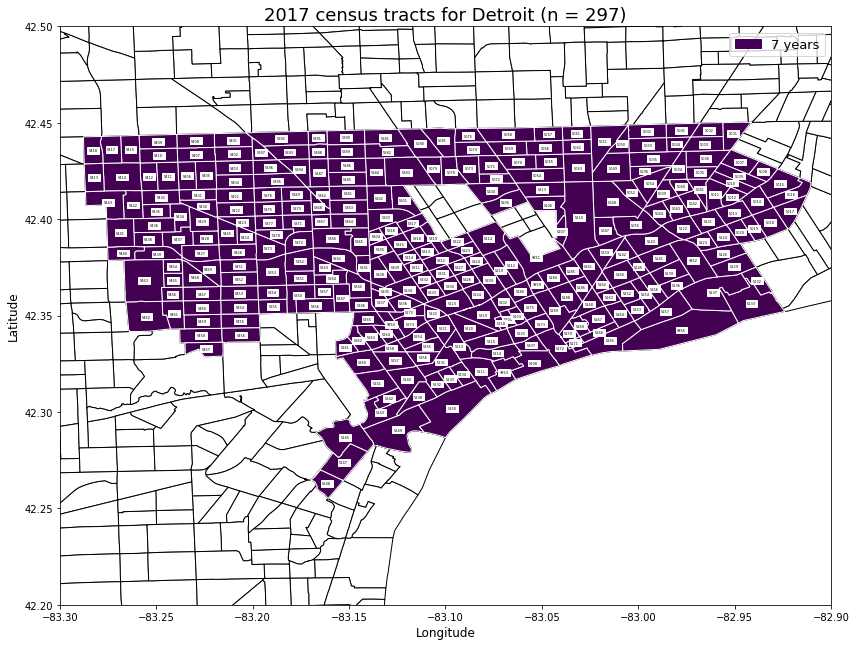

In [3]:
s = time.time()
years = np.arange(current_year-1, 2010, -1)

thecity = 'Detroit'
thestate = 26
state_abbrev = 'mi'
citycode = 22000
citylatlon = {'N': 42.5, 'S': 42.2, 'E': -82.9, 'W': -83.3}

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')

past_city_tracts_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:.0f}'.format(thestate, citycode)]
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})
    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    past_city_tracts_gdf = past_city_tracts_gdf.append(year_city_tracts_gdf)
    print('    removing boundary tracts that had only tiny overlaps...')
    past_city_tracts_gdf = past_city_tracts_gdf[past_city_tracts_gdf.geometry.area >= 1e-10]

#print('converting columns...')
past_city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(past_city_tracts_gdf['COUNTYFP'], errors='coerce')
past_city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(past_city_tracts_gdf['NAME'], errors='coerce')
past_city_tracts_gdf.crs = city_tracts_gdf.crs
past_city_tracts_gdf = past_city_tracts_gdf.set_index(['year', 'COUNTYFP', 'NAME'])

print('Counting how many years the census tracts were stable...')
current_counties = city_tracts_gdf.index.get_level_values('COUNTYFP').unique().sort_values().tolist()
current_tracts = city_tracts_gdf.index.get_level_values('NAME').unique().sort_values().tolist()

city_tracts_gdf = city_tracts_gdf.assign(nYears = np.nan)

for thiscounty in current_counties:
    for thistract in current_tracts:
        city_tracts_gdf.loc[(thiscounty, thistract), 'nYears'] = len(past_city_tracts_gdf.xs(thiscounty, level='COUNTYFP').xs(thistract, level='NAME')) + 1

e = time.time()
g = g + (e-s)
print('\n')
print('Read {0:,.0f} current tracts and {1:,.0f} past tract-years in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_tracts_gdf), len(past_city_tracts_gdf), np.floor((e-s)/60), (e-s)%60))
# Define custom discrete colorbar
bounds = []
mycmaplist = []
thecmap = plt.cm.get_cmap(thecolormap)
for i in range(0,8):
    mycmaplist.append(thecmap(i/7))
mycmap = mcolors.ListedColormap(mycmaplist)

print('plotting...')
fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))

tract_shapes_gdf.plot(ax=ax, color='white', edgecolor='black')
city_tracts_gdf.plot(column='nYears', ax=ax, cmap=mycmap, edgecolor='white')

plt.xlim(citylatlon['W'], citylatlon['E'])
plt.ylim(citylatlon['S'], citylatlon['N'])
plt.xlabel('Longitude', fontsize=48*scale)
plt.ylabel('Latitude', fontsize=48*scale)

purple_patch = mpatches.Patch(color=thecmap(1), label='7 years')
plt.legend(handles=[purple_patch], fontsize=52*scale)
#print(city_tracts_gdf.columns)
if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in city_tracts_gdf.iterrows():
        annotator = ix[1]
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
                    fontsize=14*scale)

plt.title('{0:.0f} census tracts for {1:} (n = {2:,.0f})'.format(current_year, thecity, len(city_tracts_gdf)), fontsize=72*scale)

plt.savefig(mapdir+'locator_map_{0:}.jpg'.format(thecity.lower()), format='jpg', dpi=300)

plt.tight_layout()
plt.show()


Getting census tract shapefiles for 2017...
...overlaying...
...removing boundary tracts that had only tiny overlaps...


Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Counting

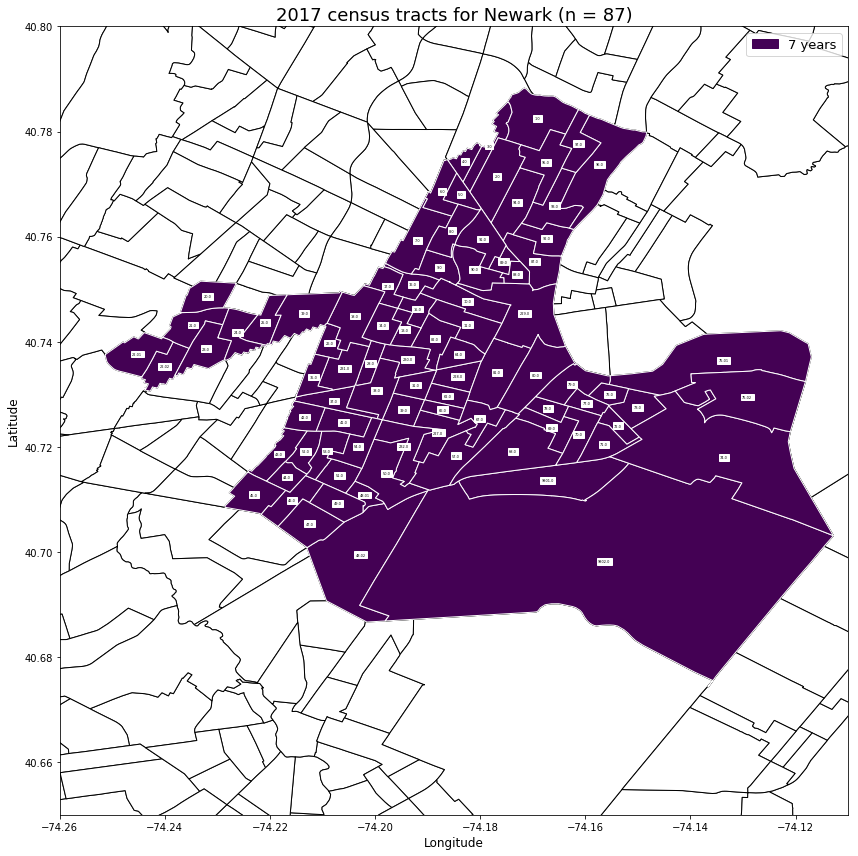

In [4]:
s = time.time()
years = np.arange(current_year-1, 2010, -1)

thisyear = 2017
thecity = 'Newark'
thestate = 34
state_abbrev = 'nj'
citycode = 51000
citylatlon = {'N': 40.8, 'S': 40.65, 'E': -74.11, 'W': -74.26}


if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')

past_city_tracts_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:.0f}'.format(thestate, citycode)]
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})
    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    past_city_tracts_gdf = past_city_tracts_gdf.append(year_city_tracts_gdf)
    print('    removing boundary tracts that had only tiny overlaps...')
    past_city_tracts_gdf = past_city_tracts_gdf[past_city_tracts_gdf.geometry.area >= 1e-10]

#print('converting columns...')
past_city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(past_city_tracts_gdf['COUNTYFP'], errors='coerce')
past_city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(past_city_tracts_gdf['NAME'], errors='coerce')
past_city_tracts_gdf.crs = city_tracts_gdf.crs
past_city_tracts_gdf = past_city_tracts_gdf.set_index(['year', 'COUNTYFP', 'NAME'])

print('Counting how many years the census tracts were stable...')
current_counties = city_tracts_gdf.index.get_level_values('COUNTYFP').unique().sort_values().tolist()
current_tracts = city_tracts_gdf.index.get_level_values('NAME').unique().sort_values().tolist()

city_tracts_gdf = city_tracts_gdf.assign(nYears = np.nan)

for thiscounty in current_counties:
    for thistract in current_tracts:
        city_tracts_gdf.loc[(thiscounty, thistract), 'nYears'] = len(past_city_tracts_gdf.xs(thiscounty, level='COUNTYFP').xs(thistract, level='NAME')) + 1

e = time.time()
g = g + (e-s)
print('\n')
print('Read {0:,.0f} current tracts and {1:,.0f} past tract-years in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_tracts_gdf), len(past_city_tracts_gdf), np.floor((e-s)/60), (e-s)%60))
# Define custom discrete colorbar
bounds = []
mycmaplist = []
thecmap = plt.cm.get_cmap(thecolormap)
for i in range(0,8):
    mycmaplist.append(thecmap(i/7))
mycmap = mcolors.ListedColormap(mycmaplist)

print('plotting...')
fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))

tract_shapes_gdf.plot(ax=ax, color='white', edgecolor='black')
city_tracts_gdf.plot(column='nYears', ax=ax, cmap=mycmap, edgecolor='white')

plt.xlim(citylatlon['W'], citylatlon['E'])
plt.ylim(citylatlon['S'], citylatlon['N'])
plt.xlabel('Longitude', fontsize=48*scale)
plt.ylabel('Latitude', fontsize=48*scale)

purple_patch = mpatches.Patch(color=thecmap(1), label='7 years')
plt.legend(handles=[purple_patch], fontsize=52*scale)
#print(city_tracts_gdf.columns)
if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in city_tracts_gdf.iterrows():
        annotator = ix[1]
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
                    fontsize=14*scale)

plt.title('{0:.0f} census tracts for {1:} (n = {2:,.0f})'.format(current_year, thecity, len(city_tracts_gdf)), fontsize=72*scale)

plt.savefig(mapdir+'locator_map_{0:}.jpg'.format(thecity.lower()), format='jpg', dpi=300)

plt.tight_layout()
plt.show()


Getting census tract shapefiles for 2017...
...overlaying...
...removing boundary tracts that had only tiny overlaps...


Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Counting

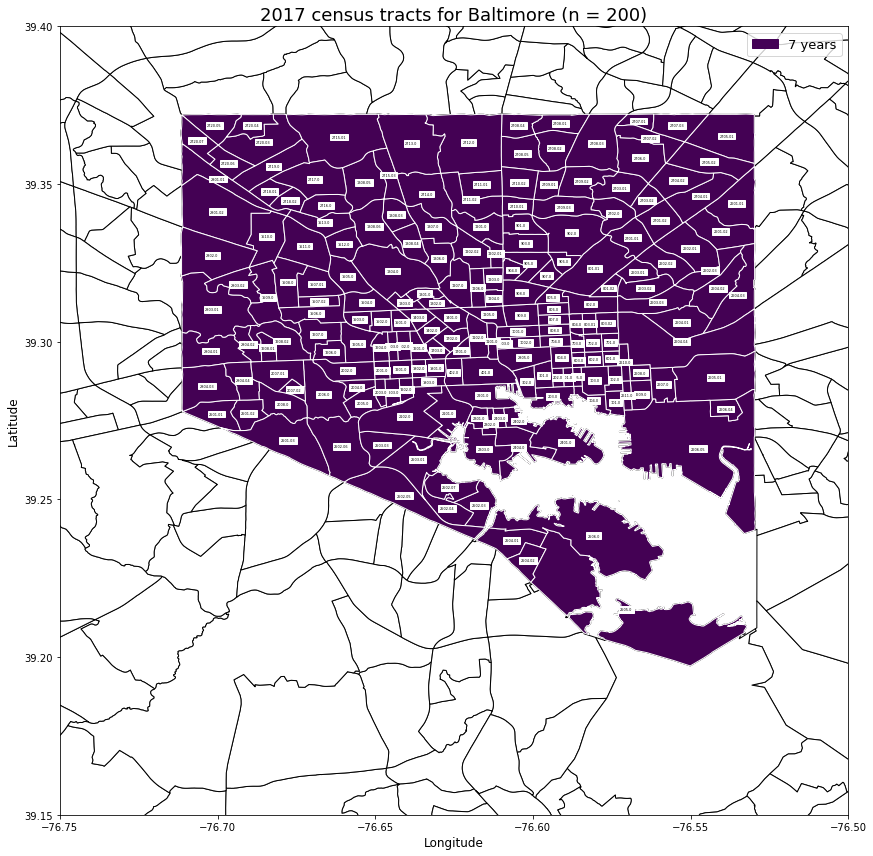

In [15]:
s = time.time()
years = np.arange(current_year-1, 2010, -1)

thecity = 'Baltimore'
thestate = 24
state_abbrev = 'md'
citycode = 4000
citylatlon = {'N': 39.4, 'S': 39.15, 'E': -76.5, 'W': -76.75}


if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')

past_city_tracts_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})
    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    past_city_tracts_gdf = past_city_tracts_gdf.append(year_city_tracts_gdf)
    print('    removing boundary tracts that had only tiny overlaps...')
    past_city_tracts_gdf = past_city_tracts_gdf[past_city_tracts_gdf.geometry.area >= 1e-10]



#print('converting columns...')
past_city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(past_city_tracts_gdf['COUNTYFP'], errors='coerce')
past_city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(past_city_tracts_gdf['NAME'], errors='coerce')
past_city_tracts_gdf.crs = city_tracts_gdf.crs
past_city_tracts_gdf = past_city_tracts_gdf.set_index(['year', 'COUNTYFP', 'NAME'])

print('Counting how many years the census tracts were stable...')
current_counties = city_tracts_gdf.index.get_level_values('COUNTYFP').unique().sort_values().tolist()
current_tracts = city_tracts_gdf.index.get_level_values('NAME').unique().sort_values().tolist()

city_tracts_gdf = city_tracts_gdf.assign(nYears = np.nan)

for thiscounty in current_counties:
    for thistract in current_tracts:
        city_tracts_gdf.loc[(thiscounty, thistract), 'nYears'] = len(past_city_tracts_gdf.xs(thiscounty, level='COUNTYFP').xs(thistract, level='NAME')) + 1

if (thecity == 'Baltimore'):
    print('cutting out harbor...')
    water_gdf = geopandas.read_file(baltimore_shapefile_basedir+'water/water.shp')
    water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)
    city_tracts_gdf = geopandas.overlay(city_tracts_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')
    tract_shapes_gdf = geopandas.overlay(tract_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

e = time.time()
g = g + (e-s)
print('\n')
print('Read {0:,.0f} current tracts and {1:,.0f} past tract-years in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_tracts_gdf), len(past_city_tracts_gdf), np.floor((e-s)/60), (e-s)%60))
# Define custom discrete colorbar
bounds = []
mycmaplist = []
thecmap = plt.cm.get_cmap(thecolormap)
for i in range(0,8):
    mycmaplist.append(thecmap(i/7))
mycmap = mcolors.ListedColormap(mycmaplist)

print('plotting...')
fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))

tract_shapes_gdf.plot(ax=ax, color='white', edgecolor='black')
city_tracts_gdf.plot(column='nYears', ax=ax, cmap=mycmap, edgecolor='white')

plt.xlim(citylatlon['W'], citylatlon['E'])
plt.ylim(citylatlon['S'], citylatlon['N'])
plt.xlabel('Longitude', fontsize=48*scale)
plt.ylabel('Latitude', fontsize=48*scale)

purple_patch = mpatches.Patch(color=thecmap(1), label='7 years')
plt.legend(handles=[purple_patch], fontsize=52*scale)
#print(city_tracts_gdf.columns)
if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in city_tracts_gdf.iterrows():
        annotator = ix[1]
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
                    fontsize=14*scale)

plt.title('{0:.0f} census tracts for {1:} (n = {2:,.0f})'.format(current_year, thecity, len(city_tracts_gdf)), fontsize=72*scale)

plt.savefig(mapdir+'locator_map_{0:}.jpg'.format(thecity.lower()), format='jpg', dpi=300)

plt.tight_layout()
plt.show()


Getting census tract shapefiles for 2017...
...overlaying...
...removing boundary tracts that had only tiny overlaps...


Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Counting

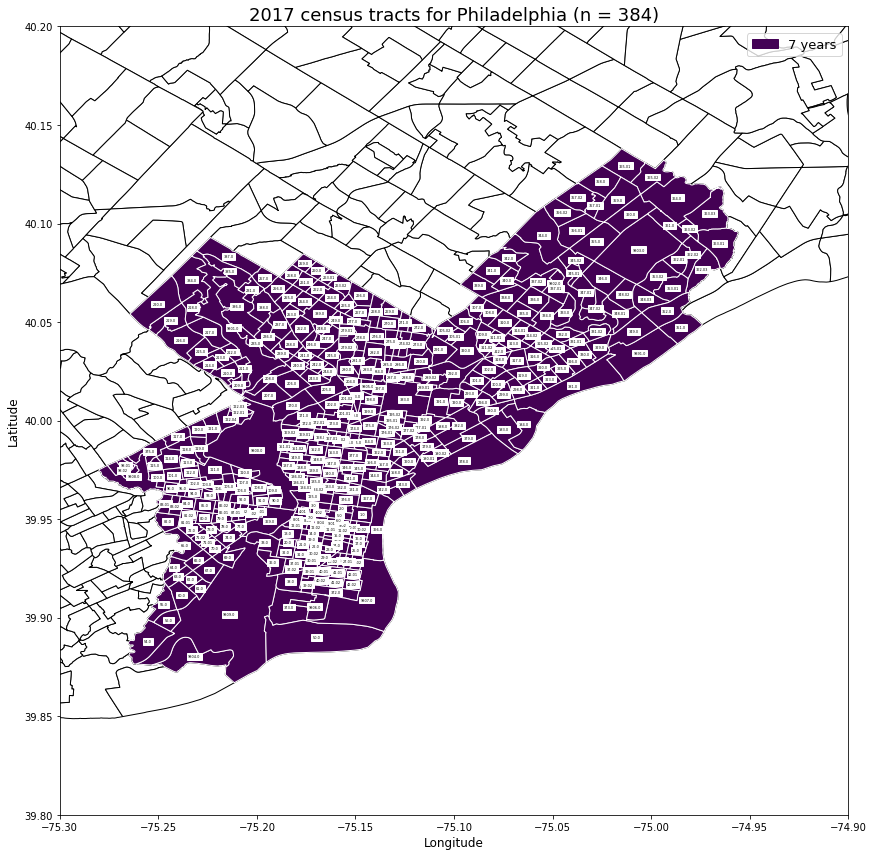

In [16]:
s = time.time()
years = np.arange(current_year-1, 2010, -1)

thecity = 'Philadelphia'
thestate = 42
state_abbrev = 'pa'
citycode = 60000
citylatlon = {'N': 40.2, 'S': 39.8, 'E': -74.9, 'W': -75.3}


if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(current_year))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(current_year, thestate))

state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/PLACE/tl_{0:.0f}_{1:02d}_place.shp'.format(current_year, thestate))

city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
city_geo_gdf = city_geo_gdf.to_crs(tract_shapes_gdf.crs)
city_geo_gdf = city_geo_gdf.rename(columns={'GEOID': 'GEOID_city', 'NAME': 'NAME_city'})


print('...overlaying...')
city_tracts_gdf = geopandas.overlay(tract_shapes_gdf, city_geo_gdf[['GEOID_city', 'NAME_city', 'geometry']], how='intersection')
#print('CRS-ing...')
#city_tracts_gdf = city_tracts_gdf.to_crs({'init': 'epsg:3734'})

print('...removing boundary tracts that had only tiny overlaps...')
city_tracts_gdf = city_tracts_gdf[city_tracts_gdf.geometry.area >= 1e-10]

city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_gdf['COUNTYFP'], errors='coerce')
city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_gdf['NAME'], errors='coerce')

city_tracts_gdf = city_tracts_gdf.set_index(['COUNTYFP', 'NAME'])

print('\n')

past_city_tracts_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})
    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    past_city_tracts_gdf = past_city_tracts_gdf.append(year_city_tracts_gdf)
    print('    removing boundary tracts that had only tiny overlaps...')
    past_city_tracts_gdf = past_city_tracts_gdf[past_city_tracts_gdf.geometry.area >= 1e-10]



#print('converting columns...')
past_city_tracts_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(past_city_tracts_gdf['COUNTYFP'], errors='coerce')
past_city_tracts_gdf.loc[:, 'NAME'] = pandas.to_numeric(past_city_tracts_gdf['NAME'], errors='coerce')
past_city_tracts_gdf.crs = city_tracts_gdf.crs
past_city_tracts_gdf = past_city_tracts_gdf.set_index(['year', 'COUNTYFP', 'NAME'])

print('Counting how many years the census tracts were stable...')
current_counties = city_tracts_gdf.index.get_level_values('COUNTYFP').unique().sort_values().tolist()
current_tracts = city_tracts_gdf.index.get_level_values('NAME').unique().sort_values().tolist()

city_tracts_gdf = city_tracts_gdf.assign(nYears = np.nan)

for thiscounty in current_counties:
    for thistract in current_tracts:
        city_tracts_gdf.loc[(thiscounty, thistract), 'nYears'] = len(past_city_tracts_gdf.xs(thiscounty, level='COUNTYFP').xs(thistract, level='NAME')) + 1

e = time.time()
g = g + (e-s)
print('\n')
print('Read {0:,.0f} current tracts and {1:,.0f} past tract-years in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_tracts_gdf), len(past_city_tracts_gdf), np.floor((e-s)/60), (e-s)%60))
# Define custom discrete colorbar
bounds = []
mycmaplist = []
thecmap = plt.cm.get_cmap(thecolormap)
for i in range(0,8):
    mycmaplist.append(thecmap(i/7))
mycmap = mcolors.ListedColormap(mycmaplist)

print('plotting...')
fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))

tract_shapes_gdf.plot(ax=ax, color='white', edgecolor='black')
city_tracts_gdf.plot(column='nYears', ax=ax, cmap=mycmap, edgecolor='white')

plt.xlim(citylatlon['W'], citylatlon['E'])
plt.ylim(citylatlon['S'], citylatlon['N'])
plt.xlabel('Longitude', fontsize=48*scale)
plt.ylabel('Latitude', fontsize=48*scale)

purple_patch = mpatches.Patch(color=thecmap(1), label='7 years')
plt.legend(handles=[purple_patch], fontsize=52*scale)
#print(city_tracts_gdf.columns)
if (show_tract_labels):
    print('adding tract labels...')
    for ix, thisrow in city_tracts_gdf.iterrows():
        annotator = ix[1]
        ax.annotate(annotator, 
                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
                    fontsize=14*scale)

plt.title('{0:.0f} census tracts for {1:} (n = {2:,.0f})'.format(current_year, thecity, len(city_tracts_gdf)), fontsize=72*scale)

plt.savefig(mapdir+'locator_map_{0:}.jpg'.format(thecity.lower()), format='jpg', dpi=300)

plt.tight_layout()
plt.show()


In [ ]:
thisyear = 2017
thestate = 26
thecounty = 83
state_abbrev = 'mi'

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
#tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '{0:03d}'.format(thecounty)]
tract_shapes_gdf.index.name = 'tract_number'

#citylatlon = {'N': 48.5, 'S': 47, 'E': -87, 'W': -90}
#state_place_file = census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_2017_{1:.0f}_place.shp'.format(thisyear, thestate)
#state_places_gdf = geopandas.read_file(state_place_file)

coastline_gdf = geopandas.read_file(coastline_shapedir+'tl_2017_us_coastline.shp')
greatlakes_coastline_gdf = coastline_gdf[coastline_gdf['NAME'] == 'Great Lakes']

print('identifying tracts that hit the coast...')

fixthese_gdf = geopandas.GeoDataFrame(data=None, columns=['tract_number', 'coastlines_hit', 'geometry'], crs=tract_shapes_gdf.crs, geometry='geometry')
fixthese_gdf = fixthese_gdf.set_index('tract_number')

i = 0
for tractix, thistract in tract_shapes_gdf.iterrows():
    if ((np.mod(i, 100) == 0) | (i == len(tract_shapes_gdf) - 1)):
        print('Tract {0:,.0f} of {1:,.0f}...'.format(i, len(tract_shapes_gdf)))
    coastlist = []
    for coastix, thiscoast in greatlakes_coastline_gdf.iterrows():
        if (thiscoast.geometry.intersects(thistract.geometry)):
            coastlist.append(coastix)
    if (len(coastlist) > 0):
        fixthese_gdf.loc[tractix, ['coastlines_hit', 'geometry']] = [coastlist, thistract.geometry]
    i = i + 1

print('fixing those tracts...')
#fixthese_gdf = fixthese_gdf.assign(coastline = np.nan)
for tractix, thistract in fixthese_gdf.iterrows():
    coasts_to_trim_with = [z for z in greatlakes_coastline_gdf.loc[thistract['coastlines_hit']].geometry.values]
    newgeo = MultiPolygon(polygonize(coasts_to_trim_with))
    fixthese_gdf.loc[tractix, 'geometry'] = newgeo
#    pprint(h)
#    fixthese_gdf[tractix, 'coastline'] = MultiPolygon(polygonize(fixthese_gdf['coastlines_hit']))
    
    
#for ix, thiscoast in coastline_gdf[coastline_gdf['NAME'] == 'Great Lakes'].iterrows():
#fixthese_gdf#.plot()
fig, ax = plt.subplots(1,1)
tract_shapes_gdf.plot(ax=ax, color='pink')
fixthese_gdf.plot(ax=ax, color='blue')
plt.show()
    #gl = MultiPolygon(polygonize([z for z in coastline_gdf[coastline_gdf['NAME'] == 'Great Lakes'].geometry]))

#df = pandas.DataFrame(columns=['geometry'])
#df.loc[0, 'geometry'] = gl
#gdf = geopandas.GeoDataFrame(df, crs=tract_shapes_gdf.crs, geometry='geometry')
#gl.type

#gdf.plot()
#tract_shapes_gdf.index.name